In [40]:
#!cp 4-bayes_opt.py 5-bayes_opt.py
!chmod +x *.py

In [29]:
#!/usr/bin/env python3
""" Hyperparameter Tuning """
import numpy as np


class GaussianProcess():
    """ noiseless 1D Gaussian process """

    def __init__(self, X_init, Y_init, l=1, sigma_f=1):
        """
        *************************************************
        ***************** constructor *******************
        *************************************************
        @X_init: is a numpy.ndarray of shape (t, 1)
                 representing the inputs already sampled
                 with the black-box function
        @Y_init: is a numpy.ndarray of shape (t, 1)
                 representing the outputs of the black-box
                 function for each input in X_init
        @t is: the number of initial samples
        @l is: the length parameter for the kernel
        @sigma_f: is the standard deviation given to the
                  output of the black-box function
        """
        self.X = X_init
        self.Y = Y_init
        self.l = l
        self.sigma_f = sigma_f
        self.K = self.kernel(X_init, X_init)

    def kernel(self, X1, X2):
        """
        calculates the covariance kernel
        matrix between two matrices using
        use the Radial Basis Function (RBF)

        @X1: is a numpy.ndarray of shape (m, 1)
        @X2: is a numpy.ndarray of shape (n, 1)

        Returns: the covariance kernel matrix as
                 a numpy.ndarray of shape (m, n)
        """
        return self.sigma_f**2 * np.exp(pow(X1 - X2.T, 2)/-2/self.l**2)

    def predict(self, X_s):
        """
        predicts the mean and standard deviation
        of points in a Gaussian process

        @X_s: is a numpy.ndarray of shape (s, 1) containing all of
              the points whose mean and standard deviation should be calculated
        @s: is the number of sample points
        Returns: mu, sigma
                 mu: is a numpy.ndarray of shape (s,) containing the mean
                     for each point in X_s, respectively
                 sigma: is a numpy.ndarray of shape (s,) containing the variance
                        for each point in X_s, respectively
        """
        K_s = self.kernel(X_s, self.X)
        K_inv = np.linalg.inv(self.K)
        mu = np.matmul(np.matmul(K_s, K_inv), self.Y)[:, 0]
        K_s2 = self.kernel(X_s, X_s)
        sigma = K_s2 - np.matmul(np.matmul(K_s, K_inv), K_s.T)
        return mu, np.diagonal(sigma)

    def update(self, X_new, Y_new):
        """
        updates a Gaussian Process
        => Updates the public instance attributes X, Y, and K

        X_new: is a numpy.ndarray of shape (1,)
               that represents the new sample point
        Y_new: is a numpy.ndarray of shape (1,)
               that represents the new sample function value
        """
        self.X = np.append(self.X, X_new[:, None], axis=0)
        self.Y = np.append(self.Y, Y_new[:, None], axis=0)
        self.K = self.kernel(self.X, self.X)
GP = GaussianProcess

In [23]:
#!/usr/bin/env python3

#GP = __import__('0-gp').GaussianProcess
import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    gp = GaussianProcess(X_init, Y_init, l=0.6, sigma_f=2)
    print(gp.X is X_init)
    print(gp.Y is Y_init)
    print(gp.l)
    print(gp.sigma_f)
    print(gp.K.shape, gp.K)
    print(np.allclose(gp.kernel(X_init, X_init), gp.K))

True
True
0.6
2
(2, 2) [[4.         0.13150595]
 [0.13150595 4.        ]]
True


In [24]:
#!/usr/bin/env python3


import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    gp = GP(X_init, Y_init, l=0.6, sigma_f=2)
    X_s = np.random.uniform(-np.pi, 2*np.pi, (10, 1))
    mu, sig = gp.predict(X_s)
    print(mu.shape, mu)
    print(sig.shape, sig)

(10,) [ 0.20148983  0.93469135  0.14512328 -0.99831012  0.21779183 -0.05063668
 -0.00116747  0.03434981 -1.15092063  0.9221554 ]
(10,) [1.90890408 0.01512125 3.91606789 2.42958747 3.81083574 3.99817545
 3.99999903 3.9953012  3.05639472 0.37179608]


In [30]:
#!/usr/bin/env python3

#GP = __import__('2-gp').GaussianProcess
import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    gp = GP(X_init, Y_init, l=0.6, sigma_f=2)
    X_new = np.random.uniform(-np.pi, 2*np.pi, 1)
    print('X_new:', X_new)
    Y_new = f(X_new)
    print('Y_new:', Y_new)
    gp.update(X_new, Y_new)
    print(gp.X.shape, gp.X)
    print(gp.Y.shape, gp.Y)
    print(gp.K.shape, gp.K)

X_new: [2.53931833]
Y_new: [1.99720866]
(3, 1) [[2.03085276]
 [3.59890832]
 [2.53931833]]
(3, 1) [[ 0.92485357]
 [-2.33925576]
 [ 1.99720866]]
(3, 3) [[4.         0.13150595 2.79327536]
 [0.13150595 4.         0.84109203]
 [2.79327536 0.84109203 4.        ]]


In [80]:
#!/usr/bin/env python3
""" Hyperparameter Tuning """
import numpy as np
from scipy.stats import norm

GP = __import__('2-gp').GaussianProcess


class BayesianOptimization():
    """ Initialize Bayesian Optimization """

    def __init__(self, f, X_init, Y_init, bounds, ac_samples,
                 l=1, sigma_f=1, xsi=0.01, minimize=True):
        """
        *************************************************
        ***************** constructor *******************
        *************************************************
        @f: is the black-box function to be optimized
        @X_init: is a numpy.ndarray of shape (t, 1) representing 
                 the inputs already sampled with the black-box function
        @Y_init: is a numpy.ndarray of shape (t, 1) representing 
                 the outputs of the black-box function for each input in X_init
        @t: is the number of initial samples
        @bounds: is a tuple of (min, max) representing the bounds of
                 the space in which to look for the optimal point
        @ac_samples: is the number of samples that should be analyzed
                 during acquisition
        @l: is the length parameter for the kernel
        @sigma_f: is the standard deviation given to the output of
                  the black-box function
        @xsi: is the exploration-exploitation factor for acquisition
        @minimize: is a bool determining whether optimization should be
                  performed for minimization (True) or maximization (False)
        """
        self.f = f
        self.X_s = np.linspace(bounds[0], bounds[1], ac_samples)[:, None]
        self.xsi = xsi
        self.minimize = minimize
        self.gp = GP(X_init, Y_init, l=l, sigma_f=sigma_f)

    def acquisition(self):
        """
        calculates the next best sample location by
        Using the Expected Improvement acquisition function
        Returns: X_next, EI
                 X_next: is a numpy.ndarray of shape (1,)
                 representing the next best sample point
                 EI: is a numpy.ndarray of shape (ac_samples,)
                 containing the expected improvement of each potential sample
        """
        mu, sig = self.gp.predict(self.gp.X)
        next_mu, sigs = self.gp.predict(self.X_s)
        opt = np.min(mu)
        improves = opt - next_mu - self.xsi
        if not self.minimize:
            improve = -improves

        Z = improves * sigs/100
        eis = improves * norm.cdf(Z) + sigs * norm.pdf(Z)
        return self.X_s[np.argmax(eis)], eis



    def optimize(self, iterations=100):
        """
        Optimizes the black-box function
        @iterations is the maximum number of iterations to perform

        *** If the next proposed point is one that has already been sampled,
            optimization should be stopped early
        Returns: X_opt, Y_opt
                 X_opt: is a numpy.ndarray of shape (1,) representing
                        the optimal point
                 Y_opt: is a numpy.ndarray of shape (1,) representing
                        the optimal function value
        """
        prev = None
        f_x = None
        f_y = None
        while iterations:
            X_next, eis = self.acquisition()
            new_y = self.f(X_next)
            if X_next == prev:
                break
            self.gp.update(X_next, new_y)
            pycodehack = f_y is None or self.minimize and f_y > new_y
            if ((pycodehack or not self.minimize and f_y < new_y)):
                f_y = new_y
                f_x = X_next
            prev = X_next
            iterations -= 1
        return f_x, f_y


In [58]:

import matplotlib.pyplot as plt
import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    bo = BayesianOptimization(f, X_init, Y_init, (-np.pi, 2*np.pi), 50, l=2, sigma_f=3, xsi=0.05)
    print(bo.f is f)
    print(type(bo.gp) is GP)
    print(bo.gp.X is X_init)
    print(bo.gp.Y is Y_init)
    print(bo.gp.l)
    print(bo.gp.sigma_f)
    print(bo.X_s.shape, bo.X_s)
    print(bo.xsi)
    print(bo.minimize)

True
True
True
True
2
3
(50, 1) [[-3.14159265]
 [-2.94925025]
 [-2.75690784]
 [-2.56456543]
 [-2.37222302]
 [-2.17988062]
 [-1.98753821]
 [-1.7951958 ]
 [-1.60285339]
 [-1.41051099]
 [-1.21816858]
 [-1.02582617]
 [-0.83348377]
 [-0.64114136]
 [-0.44879895]
 [-0.25645654]
 [-0.06411414]
 [ 0.12822827]
 [ 0.32057068]
 [ 0.51291309]
 [ 0.70525549]
 [ 0.8975979 ]
 [ 1.08994031]
 [ 1.28228272]
 [ 1.47462512]
 [ 1.66696753]
 [ 1.85930994]
 [ 2.05165235]
 [ 2.24399475]
 [ 2.43633716]
 [ 2.62867957]
 [ 2.82102197]
 [ 3.01336438]
 [ 3.20570679]
 [ 3.3980492 ]
 [ 3.5903916 ]
 [ 3.78273401]
 [ 3.97507642]
 [ 4.16741883]
 [ 4.35976123]
 [ 4.55210364]
 [ 4.74444605]
 [ 4.93678846]
 [ 5.12913086]
 [ 5.32147327]
 [ 5.51381568]
 [ 5.70615809]
 [ 5.89850049]
 [ 6.0908429 ]
 [ 6.28318531]]
0.05
True


[6.77642382e-01 6.77642382e-01 6.77642382e-01 6.77642382e-01
 6.77642382e-01 6.77642382e-01 6.77642382e-01 6.77642382e-01
 6.77642379e-01 6.77642362e-01 6.77642264e-01 6.77641744e-01
 6.77639277e-01 6.77628755e-01 6.77588381e-01 6.77448973e-01
 6.77014261e-01 6.75778547e-01 6.72513223e-01 6.64262238e-01
 6.43934968e-01 5.95940851e-01 4.93763541e-01 3.15415142e-01
 1.01026267e-01 1.73225936e-03 4.29042673e-28 0.00000000e+00
 4.54945116e-13 1.14549081e-02 1.74765619e-01 3.78063126e-01
 4.19729153e-01 2.79303426e-01 7.84942221e-02 0.00000000e+00
 8.33323492e-02 3.25320033e-01 5.70580150e-01 7.20239593e-01
 7.65975535e-01 7.52693111e-01 7.24099594e-01 7.01220863e-01
 6.87941196e-01 6.81608621e-01 6.79006118e-01 6.78063616e-01
 6.77759591e-01 6.77671794e-01]
[4.55210364]


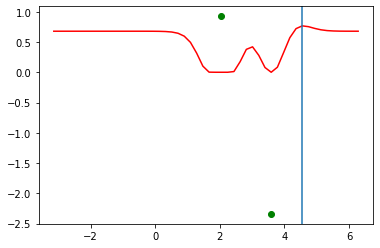

In [38]:
#!/usr/bin/env python3

#BO = __import__('4-bayes_opt').BayesianOptimization
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    bo = BayesianOptimization(f, X_init, Y_init, (-np.pi, 2*np.pi), 50, l=0.6, sigma_f=2, xsi=0.05)
    X_next, EI = bo.acquisition()

    print(EI)
    print(X_next)

    plt.scatter(X_init.reshape(-1), Y_init.reshape(-1), color='g')
    plt.plot(bo.X_s.reshape(-1), EI.reshape(-1), color='r')
    plt.axvline(x=X_next)
    plt.show()

In [81]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    """our 'black box' function"""
    return np.sin(5*x) + 2*np.sin(-2*x)

if __name__ == '__main__':
    np.random.seed(0)
    X_init = np.random.uniform(-np.pi, 2*np.pi, (2, 1))
    Y_init = f(X_init)

    bo = BayesianOptimization(f, X_init, Y_init, (-np.pi, 2*np.pi), 50, l=0.6, sigma_f=2)
    X_opt, Y_opt = bo.optimize(50)
    print('Optimal X:', X_opt)
    print('Optimal Y:', Y_opt)
    print('All sample inputs:', bo.gp.X)

Optimal X: [0.8975979]
Optimal Y: [-2.92478374]
All sample inputs: [[ 2.03085276]
 [ 3.59890832]
 [ 4.35976123]
 [ 6.0908429 ]
 [-3.14159265]
 [-0.83348377]
 [ 0.70525549]
 [ 3.01336438]
 [ 1.08994031]
 [ 3.78273401]
 [ 5.12913086]
 [-2.17988062]
 [ 0.8975979 ]]
